# Explore here

In [1]:
# time series anaylsis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [2]:
# Load the dataset 
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(url)
df.head(10)


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
5,2022-09-08 17:10:08.079328,60.081865
6,2022-09-09 17:10:08.079328,68.466704
7,2022-09-10 17:10:08.079328,67.765106
8,2022-09-11 17:10:08.079328,70.512261
9,2022-09-12 17:10:08.079328,74.656453


In [3]:
#Steps to Process This Data
#Parse the Timestamp
#Convert the timestamp column to a datetime object and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [4]:
#Ensure the index is sorted in ascending order of dates.
df.sort_index(inplace=True)

In [5]:
#Time series often require a consistent frequency. Check for missing dates:
print(pd.date_range(start=df.index.min(), end=df.index.max(), freq='D').difference(df.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [6]:
#Verify Index After processing, ensure the index is in the correct format:
print(df.index)
print(df.info())

DatetimeIndex(['2022-09-03 17:10:08.079328', '2022-09-04 17:10:08.079328',
               '2022-09-05 17:10:08.079328', '2022-09-06 17:10:08.079328',
               '2022-09-07 17:10:08.079328', '2022-09-08 17:10:08.079328',
               '2022-09-09 17:10:08.079328', '2022-09-10 17:10:08.079328',
               '2022-09-11 17:10:08.079328', '2022-09-12 17:10:08.079328',
               ...
               '2023-08-25 17:10:08.079328', '2023-08-26 17:10:08.079328',
               '2023-08-27 17:10:08.079328', '2023-08-28 17:10:08.079328',
               '2023-08-29 17:10:08.079328', '2023-08-30 17:10:08.079328',
               '2023-08-31 17:10:08.079328', '2023-09-01 17:10:08.079328',
               '2023-09-02 17:10:08.079328', '2023-09-03 17:10:08.079328'],
              dtype='datetime64[ns]', name='date', length=366, freq=None)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-09-03 17:10:08.079328 to 2023-09-03 17:10:08.079328
Data columns (total 1 columns):
 

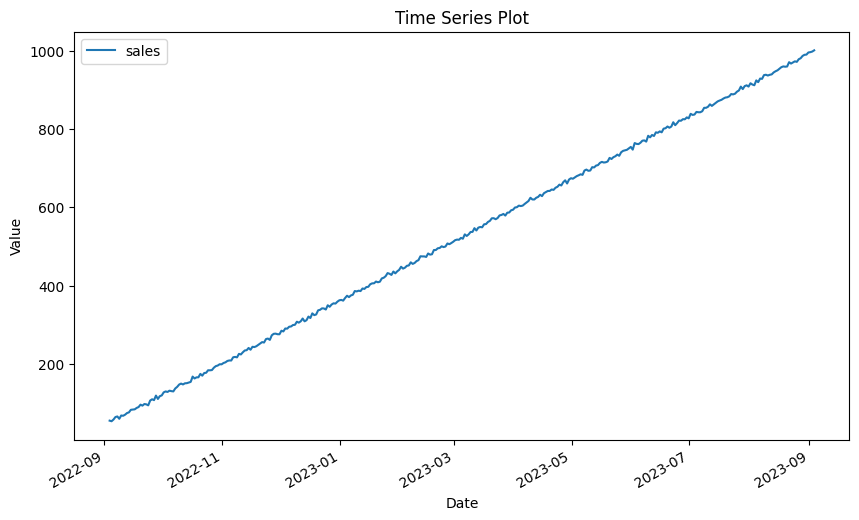

In [7]:
df.plot(figsize=(10, 6))
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


In [8]:
#Check for Missing Values: 
#Ensure there are no gaps in the time series
print(df.isnull().sum())


sales    0
dtype: int64


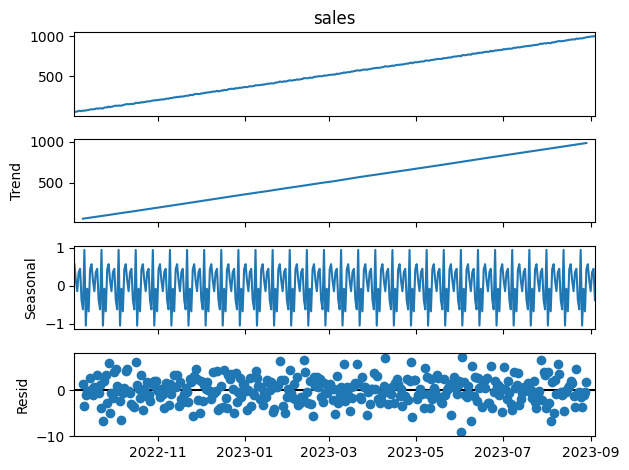

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['sales'], model='additive', period=12)
decomposition.plot()
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: 0.545414193706373
p-value: 0.9861899815311063


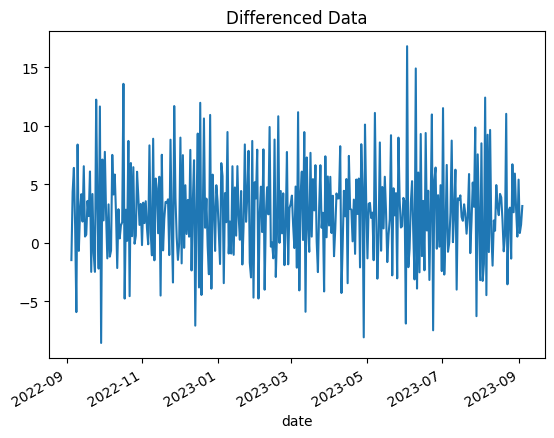

In [11]:
# Apply differencing if necessary
diff_series = df['sales'].diff().dropna()
diff_series.plot(title="Differenced Data")
plt.show()


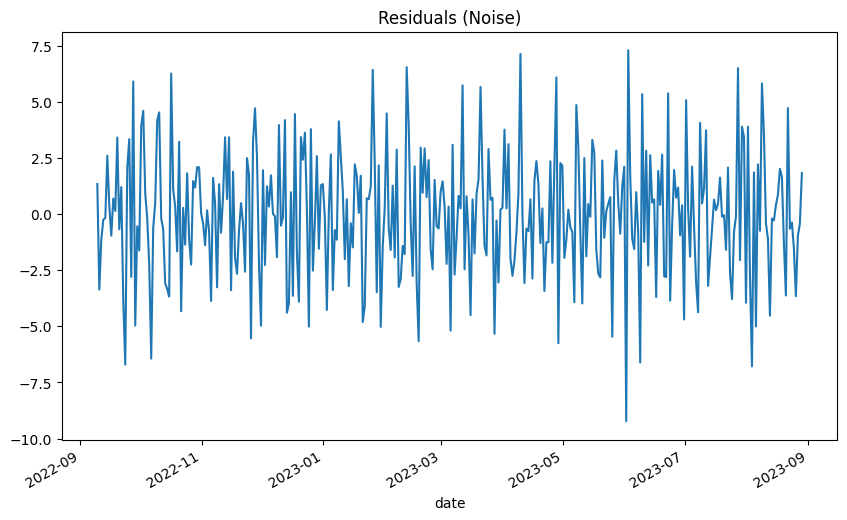

In [12]:
residual = decomposition.resid
residual.plot(figsize=(10, 6))
plt.title("Residuals (Noise)")
plt.show()


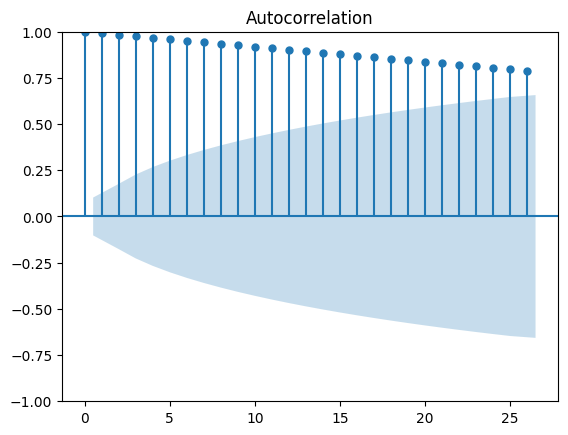

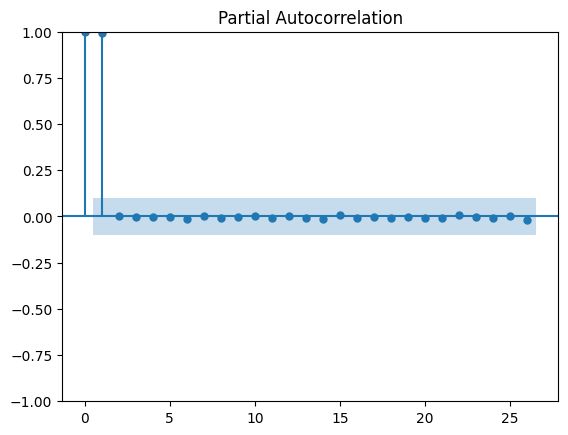

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['sales'])
plot_pacf(df['sales'])
plt.show()


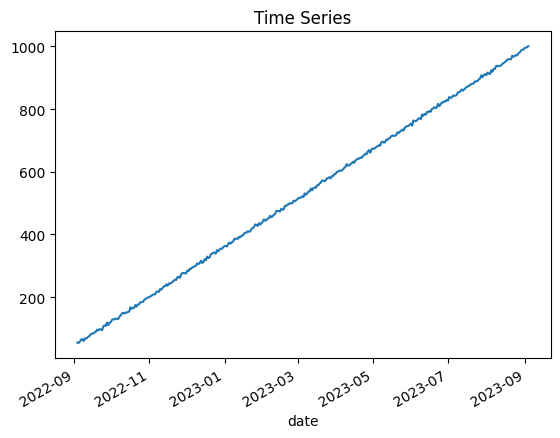

In [14]:
# check stationarity
#Visual Inspection
#Trend: Plot the time series and check for trends or seasonality. A non-stationary series often has a visible upward/downward trend or seasonal patterns.
# Based on plot no seasonality

df['sales'].plot(title="Time Series")
plt.show()

In [15]:
# Augmented Dickey-Fuller (ADF) Test
# 2nd seasonality check


from statsmodels.tsa.stattools import adfuller

result = adfuller(df['sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")


ADF Statistic: 0.545414193706373
p-value: 0.9861899815311063
Critical Values: {'1%': -3.4490648539347544, '5%': -2.8697861692116478, '10%': -2.5711631253228306}
The series is non-stationary.


In [16]:
#cross-validation 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
#Setup TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  # Specify the number of splits


In [18]:
# Initialize a list to store RMSE values for each fold
rmse_scores = []

In [19]:
# Perform TimeSeriesSplit cross-validation
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]

In [20]:
# Fit the ARIMA model on the training data
model = ARIMA(train['sales'], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [21]:
# Forecast on the test set
forecast = model_fit.forecast(steps=len(test))

In [22]:
# Calculate RMSE for the fold
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
rmse_scores.append(rmse)

print(f"Fold RMSE: {rmse}")

Fold RMSE: 3.1976269976690253


In [23]:
# Average RMSE across folds
average_rmse = np.mean(rmse_scores)
print(f"Average RMSE across folds: {average_rmse}")

Average RMSE across folds: 3.1976269976690253


/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provi

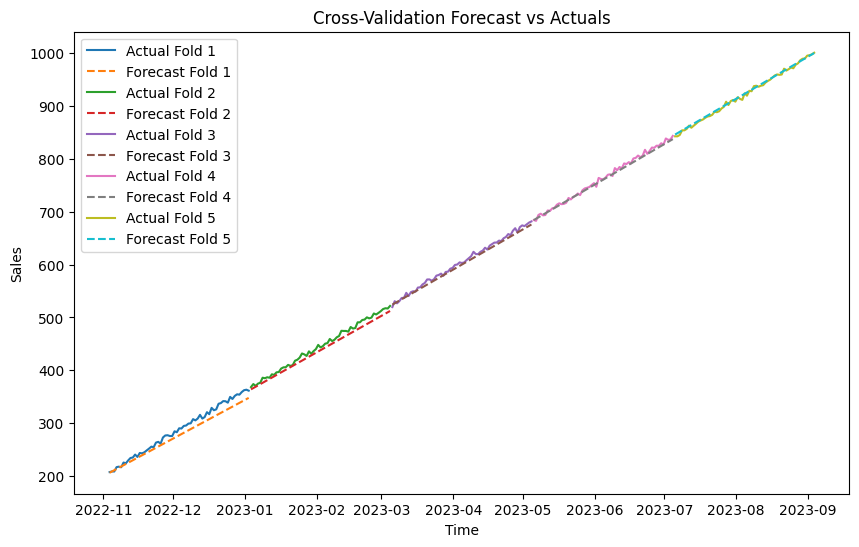

In [24]:
plt.figure(figsize=(10, 6))
for i, (train_index, test_index) in enumerate(tscv.split(df)):
    train, test = df.iloc[train_index], df.iloc[test_index]
    model = ARIMA(train['sales'], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    
    plt.plot(test.index, test['sales'], label=f'Actual Fold {i+1}')
    plt.plot(test.index, forecast, label=f'Forecast Fold {i+1}', linestyle='--')
plt.title("Cross-Validation Forecast vs Actuals")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [25]:
#Prepare the Data for Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [26]:
# Create lagged features
df['lag1'] = df['sales'].shift(1)
df['lag2'] = df['sales'].shift(2)

In [27]:
# Drop rows with NaN values (due to lagging)
df = df.dropna()

In [28]:
# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [29]:
# Define predictors (lagged features) and target (sales)
X_train, y_train = train[['lag1', 'lag2']], train['sales']
X_test, y_test = test[['lag1', 'lag2']], test['sales']

In [30]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Make predictions
lr_predictions = lr_model.predict(X_test)

In [32]:
# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression MAE: {lr_mae:.2f}")

Linear Regression MSE: 10.89
Linear Regression MAE: 2.63


In [33]:
# Compare with ARIMA predictions
arima_forecast = model_fit.forecast(steps=len(y_test))
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_mae = mean_absolute_error(y_test, arima_forecast)

print(f"ARIMA MSE: {arima_mse:.2f}")
print(f"ARIMA MAE: {arima_mae:.2f}")


ARIMA MSE: 1058.27
ARIMA MAE: 32.41


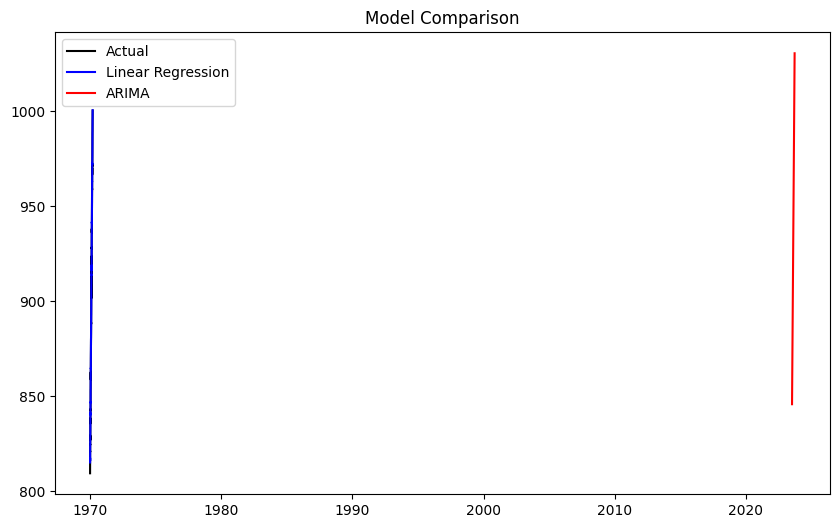

In [34]:
# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(lr_predictions, label='Linear Regression', color='blue')
plt.plot(arima_forecast, label='ARIMA', color='red')
plt.legend()
plt.title("Model Comparison")
plt.show()

In [35]:
#Train an ARIMA 
#Ensure Time Order in Forecasting
#The model should be trained on the train set and validated against the test set.

# Define p, d, q
p, d, q = 1, 1, 1  # Example values; adjust based on your analysis

# Fit ARIMA model
model = ARIMA(df['sales'], order=(p, d, q))
model_fit = model.fit()

# Forecast on the test set
forecast = model_fit.forecast(steps=len(test))

# Summary of the model
print(model_fit.summary())


/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1043.946
Date:                Wed, 01 Jan 2025   AIC                           2093.892
Time:                        17:51:14   BIC                           2105.575
Sample:                    09-05-2022   HQIC                          2098.536
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   3700.825      0.000       0.999       1.001
ma.L1         -0.9996      0.269     -3.714      0.000      -1.527      -0.472
sigma2        18.1886      5.175      3.514      0.0

In [36]:
#Evaluate the Model
#Evaluate the model's performance using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE):

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
mae = mean_absolute_error(test['sales'], forecast)
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 190.0047074993083
RMSE: 190.02420226952964


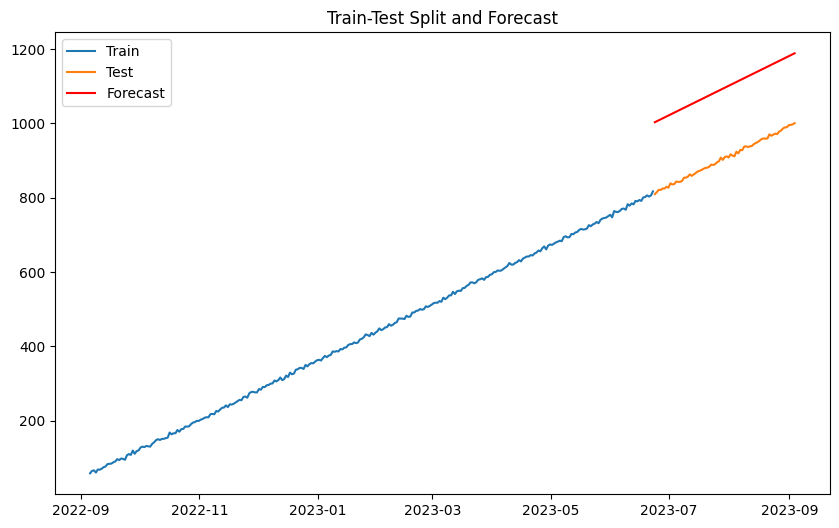

In [37]:
#Plot the actual vs. predicted values

plt.figure(figsize=(10, 6))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Train-Test Split and Forecast')
plt.show()


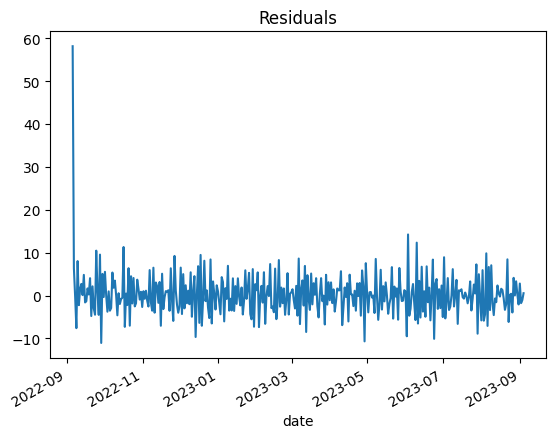

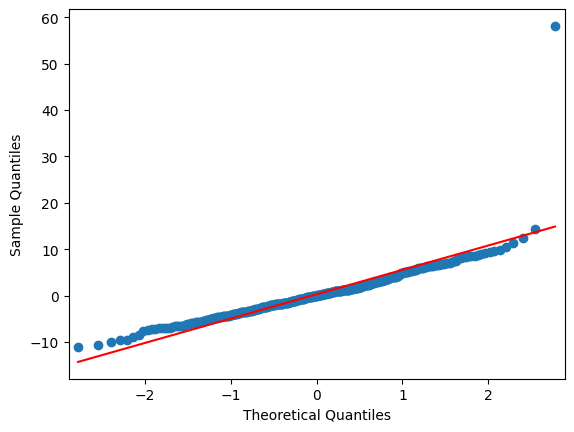

In [38]:
# Plot residuals
residuals = model_fit.resid
residuals.plot(title="Residuals")
plt.show()

# Residual diagnostics
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s')
plt.show()


In [39]:
# Forecast future values
forecast = model_fit.forecast(steps=10)
print(forecast)


2023-09-04 17:10:08.079328    1003.059217
2023-09-05 17:10:08.079328    1005.635648
2023-09-06 17:10:08.079328    1008.212079
2023-09-07 17:10:08.079328    1010.788510
2023-09-08 17:10:08.079328    1013.364940
2023-09-09 17:10:08.079328    1015.941370
2023-09-10 17:10:08.079328    1018.517799
2023-09-11 17:10:08.079328    1021.094228
2023-09-12 17:10:08.079328    1023.670657
2023-09-13 17:10:08.079328    1026.247084
Freq: D, Name: predicted_mean, dtype: float64
